<a href="https://colab.research.google.com/github/gkupolati/Module_12_Challenge/blob/main/Module_12_Challenge_credit_risk_resampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached imbalanced_learn-0.9.1-py3-none-any.whl (199 kB)


In [12]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

import warnings
warnings.filterwarnings('ignore')

**### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.**

In [13]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
from google.colab import files
uploaded = files.upload()

Saving lending_data.csv to lending_data (2).csv


**## Split the Data into Training and Testing Sets**

In [14]:
# Read the data from the df_lending_data.csv file into a Pandas DataFrame
df_lending_data = pd.read_csv('lending_data.csv')
# Review the DataFrame
df_lending_data

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0
...,...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600,1
77532,17700.0,10.662,80900,0.629172,11,2,50900,1
77533,17600.0,10.595,80300,0.626401,11,2,50300,1
77534,16300.0,10.068,75300,0.601594,10,2,45300,1


In [15]:
df_lending_data.tail()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
77531,19100.0,11.261,86600,0.653580,12,2,56600,1
77532,17700.0,10.662,80900,0.629172,11,2,50900,1
77533,17600.0,10.595,80300,0.626401,11,2,50300,1
77534,16300.0,10.068,75300,0.601594,10,2,45300,1
77535,15600.0,9.742,72300,0.585062,9,2,42300,1


## Using value_counts, how many loan_status transactions are in this dataset?

In [16]:
df_lending_data["loan_status"].value_counts()


0    75036
1     2500
Name: loan_status, dtype: int64

**### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.**

In [28]:
# Separate the data into labels/target("the loan_status column") and features of the data(all the columns except "loan_status")

# Separate the y variable, the labels(the y variable should focus on the target column)
y= df_lending_data["loan_status"]

# Separate the X variable, the features(the x variable should include all features except the labels/target)
x = df_lending_data.drop(columns=['loan_status'])

In [32]:
# Review the y variable Series & x variable DataFrame
print (y)


0        0
1        0
2        0
3        0
4        0
        ..
77531    1
77532    1
77533    1
77534    1
77535    1
Name: loan_status, Length: 77536, dtype: int64


In [34]:
print (x)

       loan_size  interest_rate  borrower_income  debt_to_income  \
0        10700.0          7.672            52800        0.431818   
1         8400.0          6.692            43600        0.311927   
2         9000.0          6.963            46100        0.349241   
3        10700.0          7.664            52700        0.430740   
4        10800.0          7.698            53000        0.433962   
...          ...            ...              ...             ...   
77531    19100.0         11.261            86600        0.653580   
77532    17700.0         10.662            80900        0.629172   
77533    17600.0         10.595            80300        0.626401   
77534    16300.0         10.068            75300        0.601594   
77535    15600.0          9.742            72300        0.585062   

       num_of_accounts  derogatory_marks  total_debt  
0                    5                 1       22800  
1                    3                 0       13600  
2                 

**### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.**


In [37]:
### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.
df_lending_data["loan_status"].value_counts()

0    75036
1     2500
Name: loan_status, dtype: int64

**### Step 4: Split the data into training and testing datasets by using `train_test_split`.**


In [41]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

In [42]:
from pandas.core.common import random_state
# Split the dataset using the train_test_split function
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =0.4, random_state=10)


In [50]:
#### Model and Fit the Data to a Logistic Regression by using the training data (`X_train` and `y_train`).

# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

## Declare/Instantiate a `LogisticRegression` model.
Logistic_regression_model = LogisticRegression(random_state=1)

In [51]:
# Fit the model using training data
lr_model = Logistic_regression_model.fit(x_train, y_train)

In [52]:
# Make and save testing predictions with the saved logistic regression model using the test data
testing_predictions = lr_model.predict(x_test)

# Review the predictions
testing_predictions


array([0, 0, 0, ..., 0, 0, 0])

In [53]:
print(y_test, testing_predictions)

28092    0
25629    0
774      0
23074    0
35977    0
        ..
54171    0
45274    0
25040    0
64808    0
18125    0
Name: loan_status, Length: 31015, dtype: int64 [0 0 0 ... 0 0 0]


In [54]:
print("mean sq. error between y_test and predicted =", np.mean(testing_predictions-y_test)**2)

mean sq. error between y_test and predicted = 5.389164271244309e-06


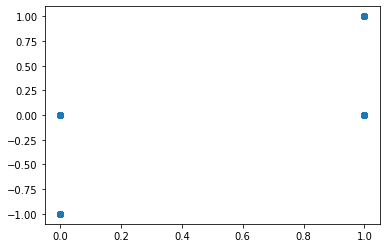

In [55]:
from pandas.io.formats.style import plt
plt.scatter(testing_predictions, testing_predictions-y_test)

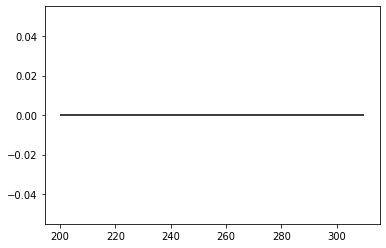

In [62]:
import numpy as np
import matplotlib.pyplot as plt

plt.hlines(y=0, xmin=200, xmax=310, colors='k')

### Step 3: Evaluate the model’s performance metrics by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

**#### Step 1: Calculate the accuracy score by evaluating `testing_targets` vs. `testing_predictions`**

In [69]:
# Print the balanced_accuracy score of the model

# Display the accuracy score for the test dataset.
balanced_accuracy_score(y_test, testing_predictions)



0.9590945886190502

In [71]:
#Generate training predictions
training_predictions = lr_model.predict(x_train)

In [72]:
# Generate a confusion matrix for the model
# Import the model for sklearn's confusion matrix
from sklearn.metrics import confusion_matrix

# Create and save the confustion matrix for the training data
training_matrix = confusion_matrix(y_train, training_predictions)

# Print the confusion matrix for the training data
print(training_matrix)


[[44793   230]
 [  160  1338]]


In [73]:
## Create and save the confustion matrix for the testing data
test_matrix = confusion_matrix(y_test, testing_predictions)

# Print the confusion matrix for the testing data
print(test_matrix)


[[29864   149]
 [   77   925]]


In [75]:
from sklearn.metrics import classification_report, confusion_matrix
## Print the training classification report.
# Create and save the training classifiction report
training_report = classification_report(y_train, training_predictions)

# Print the training classification report
print(training_report)


              precision    recall  f1-score   support

           0       1.00      0.99      1.00     45023
           1       0.85      0.89      0.87      1498

    accuracy                           0.99     46521
   macro avg       0.92      0.94      0.93     46521
weighted avg       0.99      0.99      0.99     46521



In [76]:
## Print the testing classification report.
# Create and save the testing classifiction report
testing_report = classification_report(y_test, testing_predictions)

# Print the testing classification report
print(testing_report)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30013
           1       0.86      0.92      0.89      1002

    accuracy                           0.99     31015
   macro avg       0.93      0.96      0.94     31015
weighted avg       0.99      0.99      0.99     31015



NameError: ignored

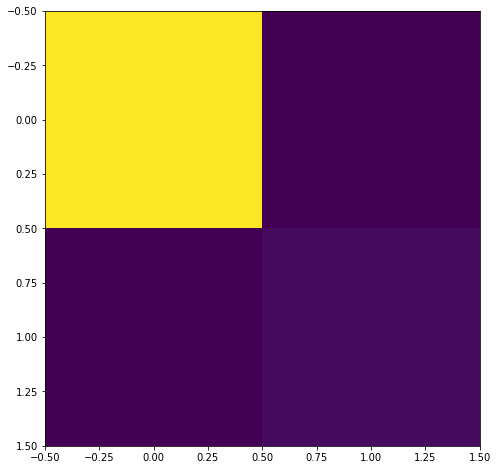

In [100]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns 
import sys
import matplotlib
matplotlib.use('Agg')

cm = confusion_matrix(y_test,testing_predictions)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs',fontsize=font_size, color='black')
ax.set_ylabel('Actual outputs', fontsize=font_size, color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()


### Step 2: Answer the following question.

**Question:**: For this dataset, how well did the model predict the actual fraudulent transactions?

**Answer:**: For this test data: Accuracy looks extremely good:  approximately 99% of the transactions in the test data were accurately categorized by the model. However, based on `value_counts`, there were very few transactions in the data that were actually fraudulent, and so our model could have had high accuracy by simply predicting all transactions to be valid. In subsequent lessons, we'll discuss how to deal with this type of **imbalanced class** problem.



### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 


In [79]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler


In [80]:
# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy=0.5)

In [81]:
# Fit the original training data to the random_oversampler model
# fit and apply the transform
X_over, y_over = oversample.fit_resample(x, y)

In [86]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.metrics import classification_report_imbalanced
# Count the distinct values of the resampled labels data
# define dataset
x, y = make_classification(n_samples=10000, weights=[0.99], flip_y=0)


In [87]:
# define dataset
x, y = make_classification(n_samples=10000, weights=[0.99], flip_y=0)
# summarize class distribution
print(Counter(y))
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
x_over, y_over = oversample.fit_resample(x, y)
# summarize class distribution
print(Counter(y_over))

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})


In [89]:
print(classification_report(y_test, testing_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     30013
           1       0.86      0.92      0.89      1002

    accuracy                           0.99     31015
   macro avg       0.93      0.96      0.94     31015
weighted avg       0.99      0.99      0.99     31015



In [91]:
confusion_matrix(y_test, testing_predictions)

array([[29864,   149],
       [   77,   925]])

In [ ]:
### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.


In [ ]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
# YOUR CODE HERE!

In [ ]:
# Fit the model using the resampled training data
# YOUR CODE HERE

In [ ]:
### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [ ]:
# Print the balanced_accuracy score of the model 
# YOUR CODE HERE!

In [ ]:
# Generate a confusion matrix for the model
# YOUR CODE HERE!


In [ ]:
# Print the classification report for the model
# YOUR CODE HERE!

In [ ]:
# Print the classification report for the model
# YOUR CODE HERE!

In [ ]:
### Step 4: Answer the following question

*Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** YOUR ANSWER HERE!




**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** WRITE YOUR ANSWER HERE!

In [ ]:
**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** WRITE YOUR ANSWER HERE!